# Explanatory Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

# Logistic Regression

We use the traditional logistic regression as a base model to derive our variables of interest and to compare with our other classifiers. Let Y be our variable of interest which can take on the value of 1 or 0. Using a linear regression would result in a model that captures values greater than 1 and less than 0, which would provide no meaning and weakens the performs of the model. The logistic function's properties restrict the predictions between 1 and 0. The logistic function is seen below:

$$
\begin{align}
f(\eta) = \frac{1}{1 + e^{-(\eta)}}
\end{align}
$$

You can see from the graphical representation that the function only outputs values between 0 and 1, and – at the mid-point – the value 0.50.

We derive the logistic regression, or logit model, by applying the logistic function to the linear regression model. In the linear regression, the relationship between the response variable and the explanatory variables is modelled with the linear model:

$$
\begin{align}
\hat{y}^{(i)} = \beta_{0} + \beta_{1}x_{1}^{(i)} + ... + \beta_{k}x_{k}^{(i)}
\end{align}
$$

With dichotomous classification our interest lies with the term $Pr(y^{(i)} = 1)$. Because with classification, probabilities should only take on values between zero and one, we plug the linear regression equation into the logistic function to get the equation:

$$
\begin{align}
Pr\big(y^{(i)} = 1\big) = \frac{1}{1 + e^{(-(\beta_{0} + \beta_{1}x_{1}^{(i)} + ... + \beta_{k}x_{k}^{(i)}))}}
\end{align}
$$

Simplifying the equation to only have the linear terms on the right side of the formula gives us the popular representation of the logit model.

$$
\begin{align}
log\Bigg(\frac{Pr\big(y^{(i)} = 1\big)}{1 - Pr\big(y^{(i)} = 1\big)}\Bigg) = log\Bigg(\frac{Pr\big(y^{(i)} = 1\big)}{Pr\big(y^{(i)} = 0\big)}\Bigg) = \beta_{0} + \beta_{1}x_{1}^{(i)} + ... + \beta_{k}x_{k}^{(i)}
\end{align}
$$

The $log(\eta)$ function is known as the log-odds ratio – the log of the probability of a positive outcome divided the probability of a negative outcome. Once we run the regression and obtain the weights we interpret the model by stating a one unit increase in $x_{k}$ results in a $exp(\beta_{k})$ increase in the odds ratio.

### Logistic Regression, things to throw in
(Cox, 1958) Introduction of Logistic Regress

OFHEO and Frame, Gerardi, and Willen (2015)

(Bagherpour)
"logistic regression are parametric algorithms that consider linear connections between predictors and classes. Moreover, these regressions measure the effect of changes in a predictor on the response, which is independent of the values of the other predictors."

Some stuff about it's usage or something or the other.

# K-Nearest Neighbor
K-Nearest Neighbors (KNN) is a non-parametric, supervised machine learning algorithm that seeks to find the closest K number of training examples, gauged by some distance measure. Once the K neighbors are found, the algorithm conducts a "vote" where the majority of nearest neighbors becomes the classification outcome. KNN is considered a "lazy learning" model because there is no defined training phase. The computation is offset until the classification phase. 
### FIND CITATIONS FOR EACH OF THESE TO WRITE SENTENCES?
- Pros
    - extremely easy to implement
    - lazy learning, so no training, faster than training for smaller datasets
    - new data can be easily added, because of no training
    - only two parameters i.e. value of K and distance function
    - K-Nearest Neighbor does not require a decision boundary compared to logistic regression, so you would expect better performance
- Cons
    - doesn't work well with high dimensions, because it becomes diffult to calculate
    - KNN high prediction cost for large datasets
    - does not work well with categorical features, because it's hard to find distance
    - KNN not able to return coefficients or identify important predictors (low transparency)

The mathmatical representation of KNN is as follows. Let $y^{(i)}$ be the classification of individual test observation $x^{(i)}$ while $I\big(y^{(k)} = 1\big)$ is an indicator function that takes the value of 1 if the i-th neighbor of the K-nearest is a positive value and 0 if it is a negative value where the nearest neighbors are determined by some distance function **(footnote papers and e.g.'s)**. In this paper we  use euclidean distance **(Make this a footnote?)**.

$$
\begin{align}
Pr\big(y^{(i)} = 1 | X = x^{(i)}\big) = \frac{1}{K}\sum_{k=1}^{K}I\big(y^{(k)} = 1\big)
\end{align}
$$

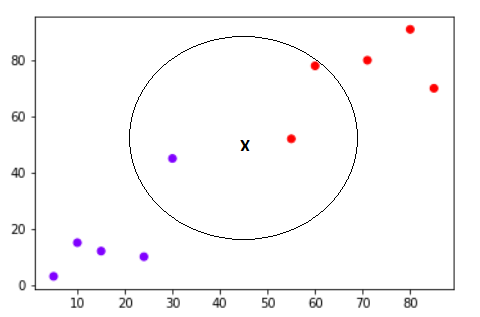

In [6]:
Image("knn illustration.png")

[Source](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)

Figure 1: This is an illustration for a two-dimensional classification problem, where K is 3. You can see this because the circle captures the 3 closest neighbors. In this case the 'X' marks marks the location of the test data we wish to classify while the red and blue dots symbolize their respective classes. Of the 3 closest neighbors, two of them are red, so the KNN classifier would output P(Y = 'Red' | X = x) = 2/3.

Determining K is arguably the most difficult part of implementing the KNN algorithm because it determines the variance-bias trade-off of our algorithm. A small K results in low bias but high variance, because it decreases the likelihood of overfitting the data. A large K results in a high bias but a low variance, because it increases the liklihood of overfitting the data. We use a cross-validation to determine what K we ought to select for implementation. 

# Classification and Regression Tree (CART)
This is also referred to as the Classification and Regression Tree (CART). We will not bother using a singular decision tree in this paper, but in this explanatory section we believe it is important to let the individual decision tree have its own section to establish the basis for the explanation of the superior ensemble classifier: Random Forest. 

In [ ]:
# Illustration

The decision tree creates nodes and determines cut-off points by minimizing the classifier error rate. There are many error rate measures, but we will be using the Gini Index (James et. al, 2015). The first term in the equation below is the Gini Index, while the second term is a tuning parameter to make the tree simpler – increasing bias slightly, but significantly decreasing variance. At each node the decision tree algorithm finds the cut-off point which minimizes the function below.

$$
\begin{align}
G = \sum_{k = 1}^{K}P_{i,k}(1 - P_{i,k}) + \lambda||T||
\end{align}
$$

Where $P_{i,k}$ is the proportion of correctly classified observations of class $k$ in region $i$ and $\lambda$ is a tuning parameter found through cross-validation while $||T||$ is the number of terminal nodes of the tree. For each $\lambda$ there is a subtree $T$.

# Random Forest

The Random Forest Classifier, RFC, is an ensemble learning method **(footnote?)** that is composed of individual decision trees – each tree is created by generating a bootstrapped **(footnote?)** dataset from the training data and randomly selecting the features to split on. In the first part of this process each tree generates its own classification. We then take the average of the predictions to create a new classifier prediction, this process is call bagging (Bootstrap AGGregatING). Let N be the number of bootstraps. 

$$
\begin{align}
f\hat{(}x) = \frac{1}{N}\sum_{n=1}^{N}\hat{f}_{n}(x)
\end{align}
$$

Aggregation reduces the variance of classifiers which in turn increases the classification accuracy; however, this does not account trees that are correlated. To obtain uncorrelated trees, we use the Random Forest algorithms. The algorithm introduces randomness to the forest by evaluating all features through their error term after splitting – which in our case is the Gini Index – and by drawing random samples of the full set of features variables.


### THINGS TO ADD TO RANDOM FOREST
Pros
- Really good for interpretability
- easily handles qualitative features
- works well with decision boundaries
- Decorrelates 

Cons
- Not as easy to interpret as a singular tree

"Random forests are a scheme proposed by Breiman (2000); Breiman (2004) to build a predictor ensemble with a set of decision trees that grows in randomly-selected subspaces of data; see Biau (2012); Geurts et al. (2006), and for a review, see Genuer et al. (2008). " - Martey et al. Solid paper for citations...

# Gradient Boosting Machine

Boosting is the process of transform weak learners into stronger learners; in our case we are boosting decision trees by using decision trees to decrease our error rate and increase overall performance of our model. Boosting is carried out in the following manner, where m is the interation: **Include something about gradient descent here too because you do it at the same time, maybe a visualization**
1. Let $f_{0}(X)$ be the initial model used to predict $y$. Let $L(y_{i},\gamma)$ be the loss function.
$$
\begin{align}
f_{0}(X) = argmin_{\gamma}\sum_{i=1}^{n}L(y_{i},\gamma)
\end{align}
$$
2. Compute the gradient of the loss function. Let $\alpha$ be the learning rate.
$$
\begin{align}
r_{i,m} = -\alpha\bigg[\frac{\partial(L(y_{i},f(x_{i}))}{\partial f(x_{i})}\bigg]
\end{align}
$$
3. Fit a model $h_{m}(x)$ on the gradient at each iteration.
4. Combine $f_{m-1}(X)$ and $h_{m}(X)$ to get $f_{m}(X)$, the boosted version of $f_{m-1}(X)$. Let $\gamma_{m}$ be the multiplier that minimizes the new loss function.
$$
\begin{align}
f_{m}(X) = f_{m-1}(X) + \gamma h_{1}(X)
\end{align}
$$
5. Repeat the process for $M$ iterations.
$$
\begin{align}
f_{M}(X) = f_{0}(X) + \sum_{m=1}^{M}\gamma_{m}h_{m}(X)
\end{align}
$$


# Support Vector Machines

The Support Vector Machine Algorithm (SVM) constructs a hyperplane that separates the classes. With SVM, the hyperplane's function is to separate the observations into their classes while maximizing the distance from the closest observations of two different classes, i.e. the margin.

**GET A VISUALIZATION**

SVM works by first systematically generating hyperplanes and then selecting the plane that maximizes the margin. Because most problems cannot be solved using a hyperplane with the same number of dimensions as features, SVM uses a kernel trick to create a higher dimensional space. By creating using a kernel, which is a function of the dot product between any two vectors of observations $(a,b)$, we significantly off-load the amount of computational effort required to increase the dimensional space.

**GET A VISUALIZATION**

While there are many kernel tricks we could test, for the sake of brevity we chose to test the three most popular:
1. Linear
$$ K(a,b) = a\cdot b $$
2. Polynomial
$$ K(a,b) = (1 + a \cdot b)^d $$
3. Radial
$$ K(a,b) = e^{-\gamma(a \cdot b)^{2}} $$

We can obtain the probability estimations by fitting a logistic regresison to the decision values (Meyer et al., 2017). This is required to generate the ROC and obtain the model's AUC value.

# Factorization Machines
High performing in (Bagherpour et al.) introduced by (Steffen Rendle, 2010) used in this context. 

